In [1]:
import numpy as np 

In [2]:
def getPositionEncoding(seq_len, dim, n=10000):
    # Initialize the positional encoding matrix
    PE = np.zeros(shape=(seq_len, dim))
    
    # Iterate over each position in the sequence
    for pos in range(seq_len):
        # Iterate over each dimension in the position vector
        for i in range(int(dim/2)):
            # Calculate the denominator for sine and cosine functions
            denominator = np.power(n, 2*i/dim)
            
            # Calculate and assign the sine and cosine values to the position encoding matrix
            PE[pos, 2*i] = np.sin(pos/denominator)
            PE[pos, 2*i+1] = np.cos(pos/denominator)
    
    # Return the positional encoding matrix
    return PE

# Call the function to generate positional encoding matrix
PE = getPositionEncoding(seq_len=4, dim=4, n=100)
print(PE)


[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.09983342  0.99500417]
 [ 0.90929743 -0.41614684  0.19866933  0.98006658]
 [ 0.14112001 -0.9899925   0.29552021  0.95533649]]


Understanding the Positional Encoding Matrix
To understand the positional encoding, let’s start by looking at the sine wave for different positions with n=10,000 and d=512.

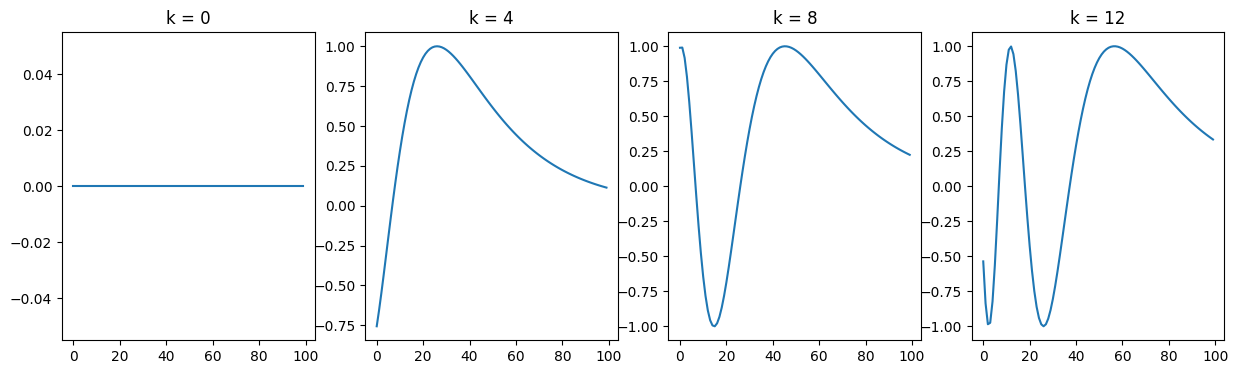

In [9]:
def plotSinusoid(k, d=512, n=10000):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.title('k = ' + str(k))

fig = plt.figure(figsize=(15, 4))    
for i in range(4):
    plt.subplot(141 + i)
    plotSinusoid(i*4)

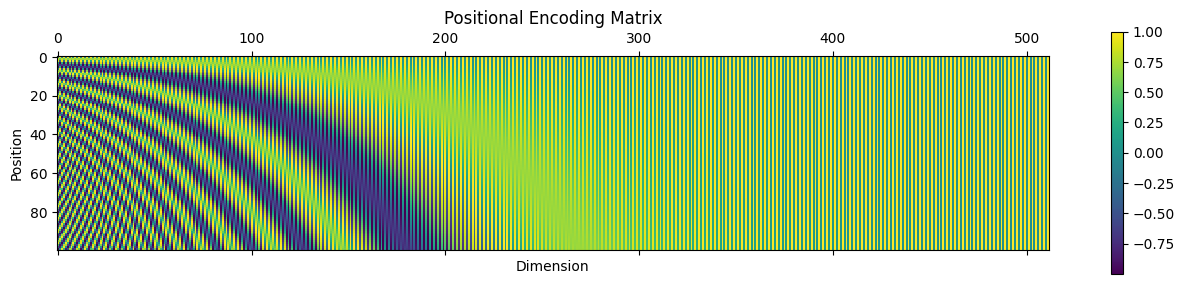

In [3]:
import matplotlib.pyplot as plt

# Setting n=10000 as done in the original paper, you get the following:
P = getPositionEncoding(seq_len=100, dim=512, n=10000)  # 100 words; 512-dimensional position vector
cax = plt.matshow(P)
plt.colorbar(cax)
plt.xlabel('Dimension')
plt.ylabel('Position')
plt.title('Positional Encoding Matrix')
plt.show()

Therefore, the position encoding layer adds the word embedding with the position encoding matrix for each token in the sequence as the input to the next layer. What needs to be noted here is that the dimensionality of the position encoding matrix should be the same as the dimensionality of the word embedding.
When i is relatively large, that is, on the right side of the figure, it basically gets 0, or 1:

In [4]:
import numpy as np

# Define parameters
n = 10000  # Value of parameter n
pos = 5    # Position
dim = 512  # Dimension

# Case where i = 400
i = 400
# Calculate the denominator for sine and cosine functions
denominator = np.power(n, 2*i/dim)
# Calculate and print the sine and cosine values for pos/denominator
print("pos/denominator =", pos/denominator, np.sin(pos/denominator))
print("pos/denominator =", pos/denominator, np.cos(pos/denominator))

# Case where i = 3
i = 3
# Recalculate the denominator for sine and cosine functions
denominator = np.power(n, 2*i/dim)
# Calculate and print the sine and cosine values for pos/denominator
print("pos/denominator =", pos/denominator, np.sin(pos/denominator))
print("pos/denominator =", pos/denominator, np.cos(pos/denominator))


pos/denominator = 2.811706625951745e-06 2.8117066259480403e-06
pos/denominator = 2.811706625951745e-06 0.9999999999960472
pos/denominator = 4.488435662236571 -0.9750270944422548
pos/denominator = 4.488435662236571 -0.2220859408055681


In [5]:
# pip install tensorflow

In [6]:
# importing all required libraries.
import tensorflow as tf
from tensorflow import convert_to_tensor, string
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

2024-05-09 08:20:18.287395: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 08:20:19.272250: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 08:20:21.527215: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 08:20:24.323330: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


The following code uses a Tokenizer object to convert each text into a sequence of integers (each integer is the index of the token in the dictionary).

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

output_sequence_length = 4
vocab_size = 10
sentences = ["How are you doing", "I am doing good"]

# Initialize a Tokenizer
tokenizer = Tokenizer()

# Fit tokenizer on sentences
tokenizer.fit_on_texts(sentences)

# Convert sentences to sequences of integers
tokenized_sent = tokenizer.texts_to_sequences(sentences)

print("Vectorized words:", tokenized_sent)


Vectorized words: [[2, 3, 4, 1], [5, 6, 1, 7]]


In [8]:
class PositionEmbeddingLayer(Layer):
    def __init__(self, sequence_length, vocab_size, output_dim, **kwargs):
        super(PositionEmbeddingLayer, self).__init__(**kwargs)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim
        )
        self.position_embedding_layer = Embedding(
            input_dim=sequence_length, output_dim=output_dim
        )
 
    def call(self, inputs):        
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices